## Observations and Insights

 - The genders of the mice were evenly distributed between female and male mice.
 - Capomulin and Ramicane clinical trials revealed the best overall outcomes towards the reduction of avg tumor volume.
 - In general, linear regression shows that the heavier the mouse was, the greater the likelihood that their tumor size was larger than the average tumor size. 
 - The correlation coefficient indicates a strong positive (negative) linear relationship via a firm linear rule.  (http://www.dmstat1.com/res/TheCorrelationCoefficientDefined.html

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
pym_merge_data = pd.merge(mouse_metadata, study_results, how ='left', on=["Mouse ID"])
pym_merge_data = pym_merge_data.loc[(pym_merge_data['Timepoint']==45)]
pym_merge_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1


In [2]:
# Remove duplicate mice by ID number that shows up for Mouse ID and Timepoint. (tutor assisted)
duplicate_mouse_ids = pym_merge_data.loc[pym_merge_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids

array([], dtype=object)

In [3]:
# Merged data with duplicates removed (tutor assisted)
pym_merge_data = pym_merge_data[pym_merge_data['Mouse ID'].isin(duplicate_mouse_ids)==False]
pym_merge_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1845,y769,Ceftamin,Female,6,27,45,68.594745,4
1855,y865,Ceftamin,Male,23,26,45,64.729837,3
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


## Summary statistics

In [4]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
pym_mean_data = pym_merge_data.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
pym_median_data = pym_merge_data.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
pym_variance_data = pym_merge_data.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
pym_std_data = pym_merge_data.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
pym_SEM_data = pym_merge_data.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

summary_stats_table = pd.DataFrame({"Mean Tumor Volume": pym_mean_data,
                                    "Median Tumor Volume": pym_median_data,
                                    "Variance Tumor Volume": pym_variance_data,
                                    "Standard Deviation Volume": pym_std_data,
                                    "SEM Volume": pym_SEM_data})

summary_stats_table

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Volume,SEM Volume
Drug Regimen,,,,,
Capomulin,36.236114,37.311846,31.460537,5.608969,1.223977
Ceftamin,64.132421,64.299830,10.585242,3.253497,0.902358
Infubinol,65.755562,66.083066,11.787426,3.433282,1.144427
Ketapril,70.662958,69.872251,23.229260,4.819674,1.453186
Naftisol,69.265506,69.563621,26.079104,5.106770,1.416363
Placebo,68.084082,69.042841,20.098783,4.483167,1.351726
Propriva,66.258529,64.957562,24.967290,4.996728,1.888586
Ramicane,34.955595,34.848627,30.101010,5.486439,1.226805
Stelasyn,68.438310,69.299149,27.340818,5.228845,1.576556


## Bar plots

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
pym_merge_data = pym_merge_data.loc[(pym_merge_data['Timepoint']==45)]
# break down the data points using value_counts function
data_points = pym_merge_data['Drug Regimen'].value_counts()
data_points

Capomulin    21
Ramicane     20
Zoniferol    14
Naftisol     13
Ceftamin     13
Stelasyn     11
Ketapril     11
Placebo      11
Infubinol     9
Propriva      7
Name: Drug Regimen, dtype: int64

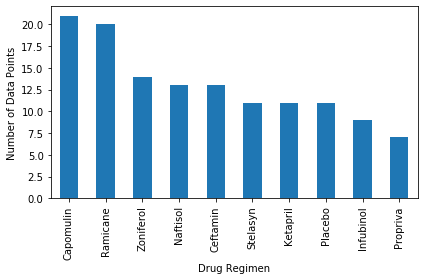

In [6]:
# after displaying the counts this one is easy using panda default
data_points.plot(kind='bar')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.tight_layout()
plt.show()

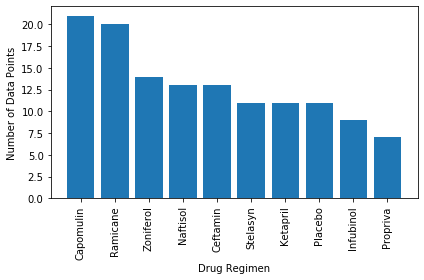

In [7]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis = np.arange(len(data_points))
tick_locations = [value for value in x_axis]
plt.xticks(rotation=90)

# Jack (TA) helped with the plt.bar function below
plt.bar(data_points.index.values, data_points)
plt.ylabel('Number of Data Points')
plt.xlabel('Drug Regimen')
plt.tight_layout()
plt.show()

## Pie plots

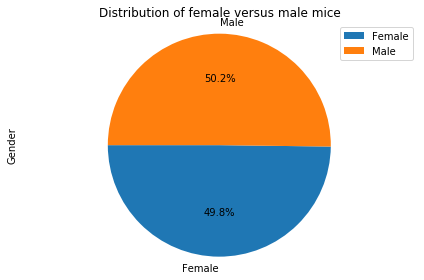

In [8]:
# generate a pie plot showing the distribution of female versus male mice using pandas

# create a groupby variable to count the mice by gender, ID
mice_gender_count = mouse_metadata.groupby("Sex")["Mouse ID"].count()

# reset the index 
mice_gender_count = mice_gender_count.reset_index(name="Gender")

# create pie plot using pandas, add %, change the angle and labels/title
mice_gender_pieplot = mice_gender_count.plot.pie(y="Gender", title= "Distribution of female versus male mice", 
                                                 labels= mice_gender_count["Sex"], startangle= 180, autopct= '%1.1f%%')

plt.axis("equal")
plt.tight_layout()
plt.show()

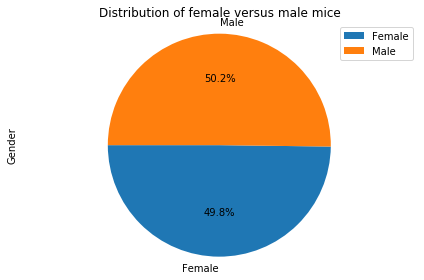

In [9]:
# generate a pie plot showing the distribution of female versus male mice using pyplot

# use groupby variable above to create pyplot, create labels, legend, title 
plt.pie(mice_gender_count["Gender"], labels= mice_gender_count['Sex'], startangle= 180, autopct= '%1.1f%%')
plt.axis('equal')
plt.legend(loc= 'upper right')
plt.title("Distribution of female versus male mice")
plt.ylabel('Gender')

plt.tight_layout()
plt.show()

## Quartiles, outliers and boxplots

In [10]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

# create a variable to hold key regimens
four_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# locate these specific regimens within the index/ array
most_promising = pym_merge_data.loc[(pym_merge_data['Drug Regimen'].isin(four_regimens))] 

# create a variable to compare timepoint to '45' (Study_Results.csv)
pym_merge_data = pym_merge_data.loc[(pym_merge_data['Timepoint']==45)]

# run the calculations
quartiles = pym_merge_data['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# print f string statements and outputs for above calculations
print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumor volume is: 40.6583443125
The upper quartile of tumor volume is: 68.8702959775
The interquartile range of tumor volume is: 28.211951665000008
The the median of tumor volume is: 63.53754596 
Values below -1.6595831850000096 could be outliers.
Values above 111.18822347500002 could be outliers.


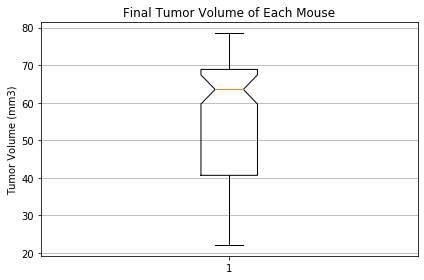

In [11]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#pym_merge_data = pym_merge_data.loc[(pym_merge_data['Timepoint']==45)]
# I was able to play around with some visualizations but need to work at finding a way to separate the regimens 
fig1, ax1 = plt.subplots()
green_diamond = dict(markerfacecolor='g', marker='D')
ax1.boxplot(pym_merge_data['Tumor Volume (mm3)'], four_regimens, flierprops=green_diamond )
ax1.yaxis.grid(True)
ax1.set_title('Final Tumor Volume of Each Mouse')
ax1.set_ylabel('Tumor Volume (mm3)')

plt.tight_layout()
plt.show()

## Line and scatter plots

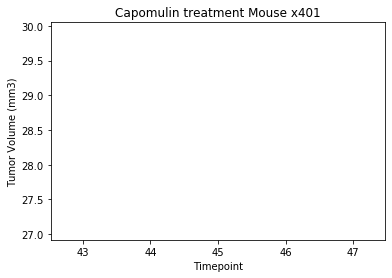

In [12]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin = pym_merge_data.loc[pym_merge_data['Drug Regimen'] == "Capomulin"]
mouse_x401 = capomulin.loc[capomulin['Mouse ID']== 'x401']
#pym_merge_data = pym_merge_data.loc[(pym_merge_data['Timepoint']==45)]
### need to fix timepoint to '45'
plt.plot(mouse_x401['Timepoint'], mouse_x401['Tumor Volume (mm3)'])
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment Mouse x401')
plt.show()

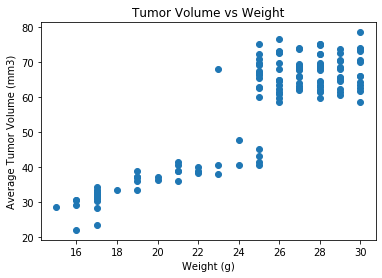

In [13]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# locate 'Capomulin' for each row in Drug Regimen column
capomulin_regimen = pym_merge_data.loc[(pym_merge_data['Drug Regimen'] == 'Capomulin')]

# use groupby to focus on each mouse ID, their weight and calculated avg tumor volume
capomulin_regimen = pym_merge_data.groupby(['Mouse ID','Weight (g)'])['Tumor Volume (mm3)'].mean()

# reset the index 
capomulin_regimen = pym_merge_data.reset_index(drop=True)

# plot the scatter plot
plt.scatter(capomulin_regimen['Weight (g)'], capomulin_regimen['Tumor Volume (mm3)'])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Tumor Volume vs Weight')
plt.show()

In [14]:
# Calculate the correlation coefficient and linear regression model between mouse weight and average tumor volume for the Capomulin treatment.
weight = capomulin_regimen['Weight (g)']
tumor_volume = capomulin_regimen['Tumor Volume (mm3)']
#pym_merge_data = pym_merge_data.loc[(pym_merge_data['Timepoint']==45)]
print(f"The correlation coefficient for the Capomulin regimen is {round(st.pearsonr(weight, tumor_volume)[0],2)}")
capomulin_regimen.corr(method= 'pearson')

### need to fix timepoint to '45'

The correlation coefficient for the Capomulin regimen is 0.88


,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Age_months,1.000000,0.080723,NaN,0.097925,0.088744
Weight (g),0.080723,1.000000,NaN,0.884504,0.515499
Timepoint,NaN,NaN,NaN,NaN,NaN
Tumor Volume (mm3),0.097925,0.884504,NaN,1.000000,0.489087
Metastatic Sites,0.088744,0.515499,NaN,0.489087,1.000000


slope: 3.240779 intercept: -23.544176
R-squared: 0.782347


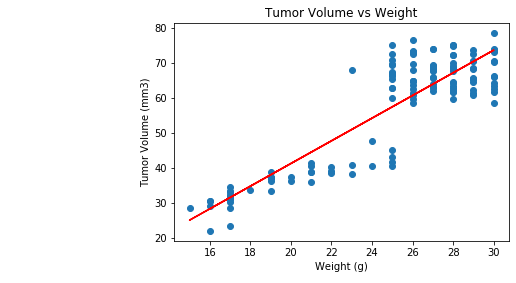

In [15]:
# Plot the linear regression model on top of the previous scatter plot.

# Resource: 'https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html'

# calculate linear regression for slope, intercept, rvalue, pvalue, stderr
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, tumor_volume)
print("slope: %f intercept: %f" % (slope, intercept))
print("R-squared: %f" % rvalue**2)

# Resource: '../Lessons/05-Matplotlib/3/Activities/08-Ins_Fits_and_Regression/Solved/regression.ipynb'
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight, tumor_volume)
plt.plot(weight, regress_values, "r-")
plt.annotate(line_eq, (6,10), fontsize=15, color="red")

plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume vs Weight')
plt.show()

In [16]:
# NEED TO FIX TIMEPOINT TO '45' 